# Logistic Regression

Подход 2: логистическая регрессия
Линейные методы работают гораздо быстрее композиций деревьев, поэтому кажется разумным воспользоваться именно ими для ускорения анализа данных. Одним из наиболее распространенных методов для классификации является логистическая регрессия.

<hr>

Approach 2: logistic regression
Linear methods work much faster than tree compositions, so it seems reasonable to use them to speed up data analysis. One of the most common methods for classification is logistic regression.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('./train_2.csv', index_col='match_id')
test=pd.read_csv('./test_2.csv', index_col='match_id')
y=data.radiant_win
data.drop("radiant_win",axis=1,inplace=True)

Важно: не забывайте, что линейные алгоритмы чувствительны к масштабу признаков! Может пригодиться sklearn.preprocessing.StandartScaler.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(data)
Xtest = scaler.transform(test)

1- Evaluate the quality of logistic regression (sklearn.linear_model.LogisticRegression with L2-regularization) using cross-validation using the same scheme used for gradient boosting. Choose the best regularization parameter (C). What is the best quality you've got? How does it relate to the quality of gradient boosting? How can you explain this difference? Is logistic regression faster than gradient boosting?

In [5]:
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring='roc_auc'
ansr=-1
scores=[]
for num in range(-3,4):
    C=10**num
    print C
    start_time = datetime.datetime.now()
    clf = LogisticRegression(random_state=42,C=C)
    scr=cross_val_score(clf, Xtrain, y, cv=cv,scoring = scoring).mean()
    scores.append(scr)
    print 'Time elapsed:', datetime.datetime.now() - start_time

0.001
Time elapsed: 0:00:18.932617
0.01
Time elapsed: 0:00:24.183147
0.1
Time elapsed: 0:00:24.958520
1
Time elapsed: 0:00:25.377952
10
Time elapsed: 0:00:25.041222
100
Time elapsed: 0:00:25.450075
1000
Time elapsed: 0:00:25.127803


In [6]:
maxInd=np.array(scores).argmax()
optC=10**(int(maxInd)-3)
maxSc=scores[maxInd]
print "max accuracy for c={}, accuracy={}".format(optC,maxSc)

import matplotlib.pyplot as plt
plt.plot(range(-3,4),scores)
plt.xlabel('log10(C)')
plt.ylabel('roc_auc accuracy')
plt.grid()
plt.show()

max accuracy for c=0.01, accuracy=0.753652099007


<hr>
2- Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?

2- Among the characteristics in the sample are categorical, which we used as numeric, which is hardly a good idea. The categorical features in this task are eleven: lobby_type and r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Remove them from the sample, and perform cross-validation for logistic regression on a new sample with the selection of the best regularization parameter. Has the quality changed? How can you explain this?

In [6]:
categorical=["r{}_hero".format(i) for i in range(1,6)]
categorical+=["d{}_hero".format(i) for i in range(1,6)]
categorical.append('lobby_type')
clean_data=data.drop(categorical,axis=1)
clean_test=test.drop(categorical,axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtrain = scaler.fit_transform(clean_data)
Xtest = scaler.transform(clean_test)

In [8]:
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring='roc_auc'
ansr=-1
scores=[]
for num in range(-3,4):
    C=10**num
    print C
    start_time = datetime.datetime.now()
    clf = LogisticRegression(random_state=42,C=C)
    scr=cross_val_score(clf, Xtrain, y, cv=cv,scoring = scoring).mean()
    scores.append(scr)
    print 'Time elapsed:', datetime.datetime.now() - start_time

0.001
Time elapsed: 0:00:08.374539
0.01
Time elapsed: 0:00:10.898077
0.1
Time elapsed: 0:00:13.282407
1
Time elapsed: 0:00:12.270516
10
Time elapsed: 0:00:12.231184
100
Time elapsed: 0:00:12.565225
1000
Time elapsed: 0:00:12.938179


max accuracy for c=0.01, accuracy=0.716559388563


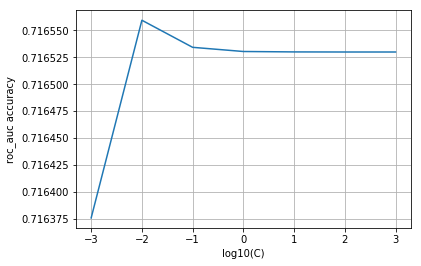

In [9]:
maxInd=np.array(scores).argmax()
optC=10**(int(maxInd)-3)
maxSc=scores[maxInd]
print "max accuracy for c={}, accuracy={}".format(optC,maxSc)

import matplotlib.pyplot as plt
plt.plot(range(-3,4),scores)
plt.xlabel('log10(C)')
plt.ylabel('roc_auc accuracy')
plt.grid()
plt.show()

3- На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).

3- In the previous step, we excluded from the sample the signs rM_hero and dM_hero, which show which characters were playing for each team. These are important signs - the characters have different characteristics, and some of them win more often than others. Find out from the data how many different identifiers of heroes exist in this game (you may need to use unique or value_counts).

In [10]:
heros=pd.read_csv("./datasets/dictionaries/heroes.csv")
NumHeros=heros['id'].max()

4- Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

4- Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

In [11]:
pick = np.zeros((data.shape[0], NumHeros))
for i,ind in enumerate(data.index):
    for h in range(1,6):
        pick[i][data["r{}_hero".format(h)][ind]-1]=1
        pick[i][data["d{}_hero".format(h)][ind]-1]=-1

picktest=np.zeros((test.shape[0], NumHeros))
for i,ind in enumerate(test.index):
    for h in range(1,6):
        picktest[i][test["r{}_hero".format(h)][ind]-1]=1
        picktest[i][test["d{}_hero".format(h)][ind]-1]=-1


In [12]:
Xtrain=np.concatenate([Xtrain,pick],axis=1)
Xtest=np.concatenate([Xtest,picktest],axis=1)

5- Проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Какое получилось качество? Улучшилось ли оно? Чем вы можете это объяснить?

5- Conduct cross-validation for logistic regression on a new sample with selection of the best regularization parameter. What was the quality? Has it improved? How can you explain this?

In [13]:
import time
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring='roc_auc'
ansr=-1
scores=[]
for num in range(-3,4):
    C=10**num
    print C
    start_time = datetime.datetime.now()
    clf = LogisticRegression(random_state=42,C=C)
    scr=cross_val_score(clf, Xtrain, y, cv=cv,scoring = scoring).mean()
    scores.append(scr)
    print 'Time elapsed:', datetime.datetime.now() - start_time

0.001
Time elapsed: 0:00:10.634608
0.01
Time elapsed: 0:00:20.587332
0.1
Time elapsed: 0:00:29.307341
1
Time elapsed: 0:00:28.198037
10
Time elapsed: 0:00:27.225418
100
Time elapsed: 0:00:26.628673
1000
Time elapsed: 0:00:26.843332


max accuracy for c=0.1, accuracy=0.751947572682


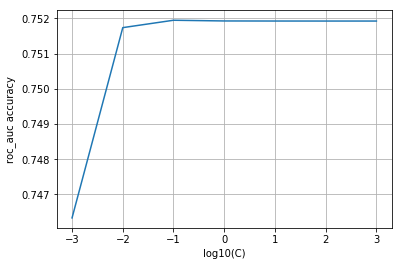

In [14]:
maxInd=np.array(scores).argmax()
optC=10**(int(maxInd)-3)
maxSc=scores[maxInd]
print "max accuracy for c={}, accuracy={}".format(optC,maxSc)

import matplotlib.pyplot as plt
plt.plot(range(-3,4),scores)
plt.xlabel('log10(C)')
plt.ylabel('roc_auc accuracy')
plt.grid()
plt.show()

6- Постройте предсказания вероятностей победы команды Radiant для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. что модель не получилась константной).

6- Build predictions of Radiant team winning probabilities for the test sample using the best of the models studied (best in terms of AUC-ROC for cross-validation). Make sure that the predicted probabilities are adequate - they are on the interval [0, 1], do not coincide (ie that the model did not turn out to be constant).

In [12]:
clf = LogisticRegression(random_state=42,C=0.01)
clf.fit(Xtrain,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
ids=test.index
pred=clf.predict_proba(Xtest)

In [14]:
df = pd.DataFrame({'match_id':ids, 'radiant_win': pred.T[1]})
df.to_csv("predictionv2.csv", index=False)